In [ ]:
from bookworm import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,12)

import pandas as pd
import numpy as np
import networkx as nx

In [219]:
def split_book(book, n_sections=10, cumulative=True):
    '''
    Split a book into n equal parts, with optional cumulative
    
    Parameters
    ----------
    book : string (required)
        the book to be split
    n_sections :  (required)
        the number of sections which we want to split our book into
    cumulative : bool (optional)
        If true, the returned sections will be cumulative, ie all 
        will start at the book's beginning and end at evenly distributed
        points throughout the book

    Returns
    -------
    split_book : list
        the given book split into the specified number of even (or, if 
        cumulative is set to True, uneven) sections
    '''
    book_sequences = get_sentence_sequences(book)
    split_book = np.array_split(np.array(book_sequences), n_sections)
    
    if cumulative is True:
        split_book = [np.concatenate(split_book[:pos + 1]) 
                      for pos, section in enumerate(split_book)]
    
    return split_book

In [220]:
def chronological_network(book_path, n_sections=10, cumulative=True):
    '''
    '''
    book = load_book(book_path)
    sections = split_book(book, n_sections, cumulative)
    graph_dict = {}
    
    for i, section in enumerate(sections):
        characters = extract_character_names(' '.join(section))
        df = find_connections(sequences=section, characters=characters)
        cooccurence = calculate_cooccurence(df)
        interaction_df = get_interaction_df(cooccurence, 
                                            characters,
                                            threshold=2)

        graph_dict[i] = nx.from_pandas_dataframe(interaction_df,
                                                 source='source',
                                                 target='target')
    return graph_dict

/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

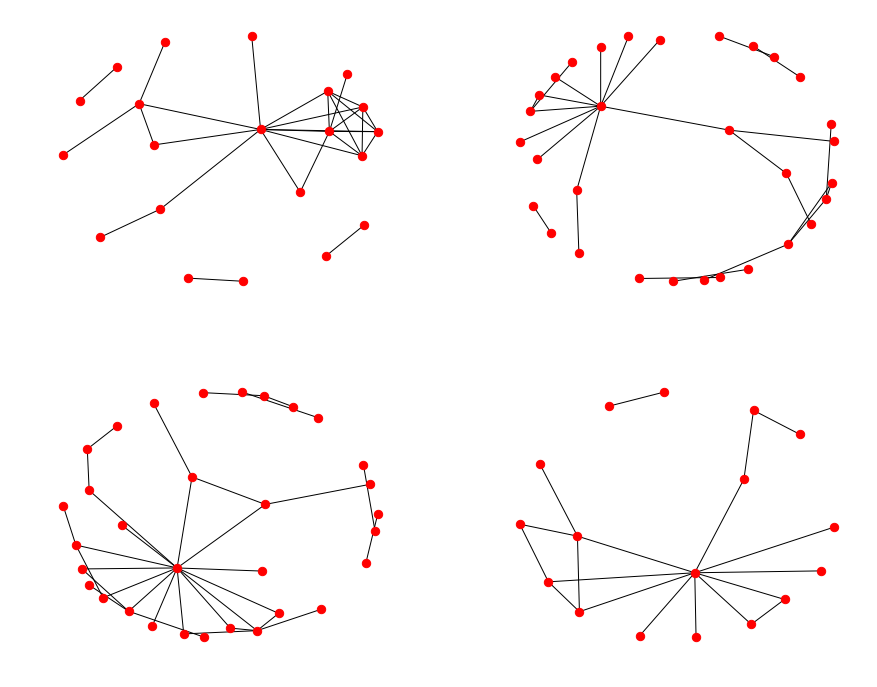

In [221]:
graph_dict = chronological_network('data/raw/hp_philosophers_stone.txt', 
                                   n_sections=4,
                                   cumulative=False)

plt.subplot(221)
nx.draw(graph_dict[0], node_size=70)
plt.subplot(222)
nx.draw(graph_dict[1], node_size=70)
plt.subplot(223)
nx.draw(graph_dict[2], node_size=70)
plt.subplot(224)
nx.draw(graph_dict[3], node_size=70)

/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

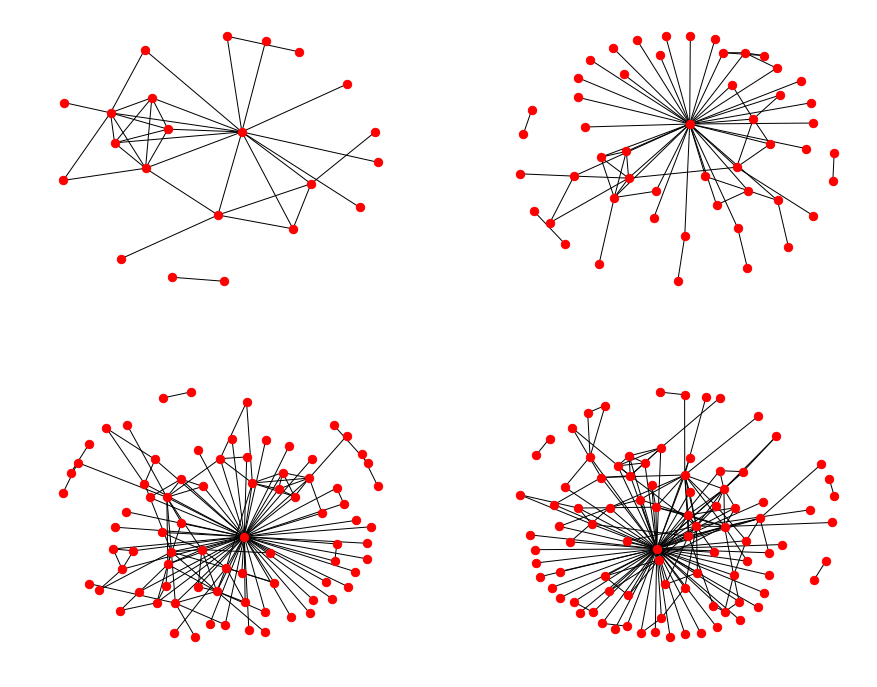

In [211]:
graph_dict = chronological_network('data/raw/hp_philosophers_stone.txt', 
                                   n_sections=4,
                                   cumulative=True)

plt.subplot(221)
nx.draw(graph_dict[0], node_size=70)
plt.subplot(222)
nx.draw(graph_dict[1], node_size=70)
plt.subplot(223)
nx.draw(graph_dict[2], node_size=70)
plt.subplot(224)
nx.draw(graph_dict[3], node_size=70)

In [ ]:
graph_dict = chronological_network('data/raw/hp_philosophers_stone.txt', 
                                   n_sections=12,
                                   cumulative=True)

/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

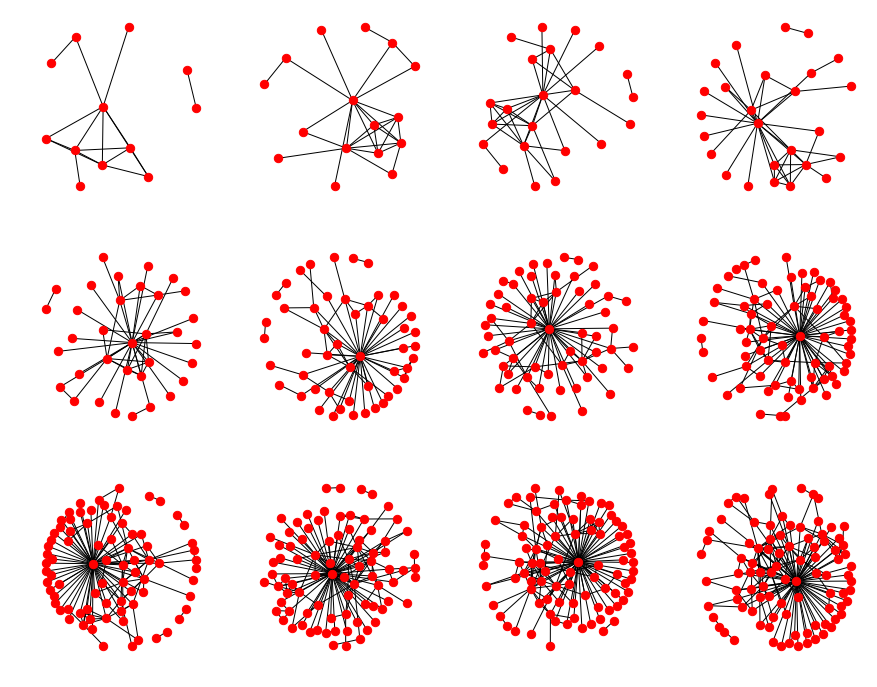

In [217]:
fig = plt.figure()
for i in range(1, 13):
    fig.add_subplot(3, 4, i)
    nx.draw(graph_dict[i-1], node_size=70)

In [218]:
type(split_book('data/raw/hp_philosophers_stone.txt'))

list

more to read and develop here 
- https://en.wikipedia.org/wiki/Time-varying_network
- https://en.wikipedia.org/wiki/Complex_network